# Laptop data and specification analysis as a Buying guide and Price Prediction using Machine Learning Algorithms.

## _Laptops are compact enough to carry with you, yet versatile enough to run demanding applications. Notebooks are the best tool for doing serious work or play whether you're at home, on the road or in a college classroom. For those reasons, we've compiled lists of the best business laptops and best college laptops, not to mention our best laptops rankings for most users._

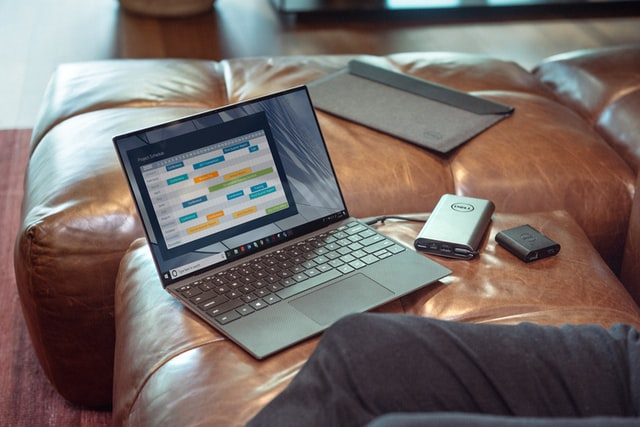

## _While standalone tablets and smartphones are always popular, most people realize that everything from typing a research paper to crunching videos to gaming works better on a laptop. So what type of laptop should you get? We put together a laptop buying guide to help you out._



## _There's a wide variety of sizes, features and prices, which makes choosing the best laptop a challenge. That's why you need to figure out what your needs are._ 

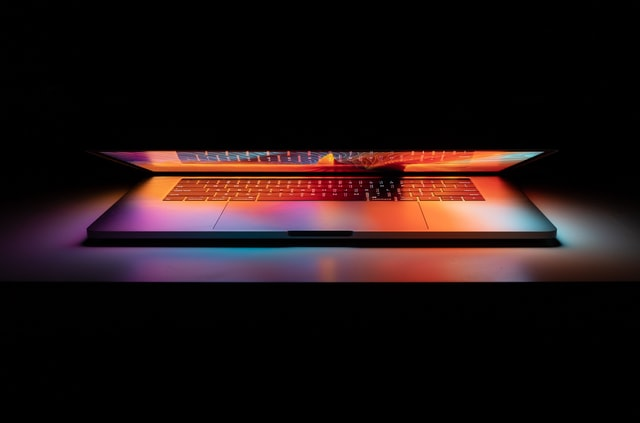

## _Laptops offer many advantages. They are small and light enough to be portable, yet still powerful enough to run complex, demanding programs. They offer capabilities and a degree of usefulness not found in even the best tablet or smartphone._

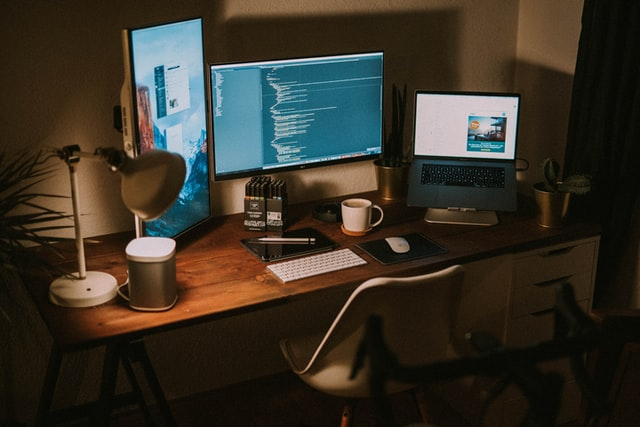

## _With an almost unlimited number of options for a large variety of use cases, equipping and buying the right laptop, tablet, or mobile device can be a daunting and confusing challenge. Whether you need to buy one or multiple laptops, for business or personal use, our laptop buying guide will help you make a wise, informed purchasing decision._

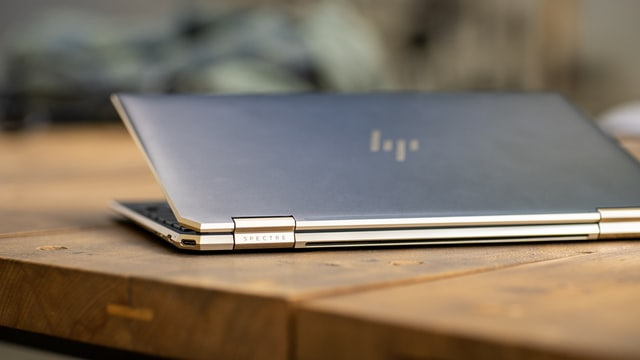

---
---

## _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## _Reading the Dataset_

In [6]:
df = pd.read_csv('laptop data.csv',encoding='latin-1')

In [7]:
df = df.set_index('laptop_ID')

In [8]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
laptop_ID,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## _Checking for null values_

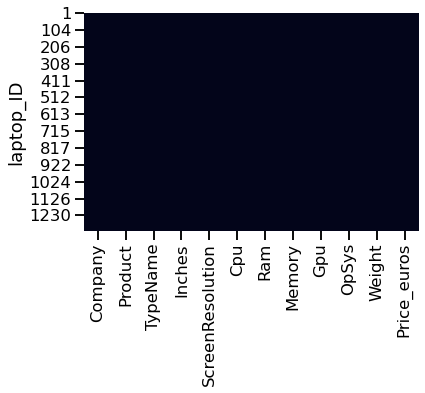

In [13]:
sns.heatmap(df.isnull(), cbar=False)

### _As it seems, no null values to take care of ._
---

## _Data Preprocessing_

In [14]:
df["Ram"] = df["Ram"].str.replace('GB', '') 
df["Weight"] = df["Weight"].str.replace('kg', '')
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000') 

In [15]:
new2 = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new2[0]
df["first"]=df["first"].str.strip() # First part of Memory
df["second"]= new2[1] # Second part of Memory

In [16]:
# Categorization of first part of Memory

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [17]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

In [18]:
# Categorization of second part of Memory

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [19]:
df['second'] = df['second'].str.replace(r'\D', '')

In [20]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [21]:
# Calculation of Total Memory
df["Total_Memory"]=(df["first"]*(df["Layer1HDD"]+df["Layer1SSD"]+df["Layer1Hybrid"]+df["Layer1Flash_Storage"])+df["second"]*(df["Layer2HDD"]+df["Layer2SSD"]+df["Layer2Hybrid"]+df["Layer2Flash_Storage"]))
df["Memory"]=df["Total_Memory"]

In [22]:
# Calculation of Category HDD,SSD,Hybrid,Flash Storage
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [23]:
# new data frame with split value columns 
new = df["ScreenResolution"].str.split("x", n = 1, expand = True) 
df["X_res"]= new[0] 
df["Y_res"]= new[1] 
df["Y_res"]=pd.to_numeric(df["Y_res"])
df["Y_res"] = df["Y_res"].astype(float)

In [24]:
df["X_res"]=(df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: pd.Series(x).astype(int)).mean(1))
df["X_res"]=pd.to_numeric(df["X_res"])

In [25]:
# Updating the columns
df["PPI"]=(((df["X_res"]**2+df["Y_res"]**2)**(1/2))/df["Inches"]).astype(float)
df["ScreenResolution"]=(df["X_res"]*df["Y_res"]).astype(float)
df["Ram"] = df["Ram"].astype(int)
df["Weight"] = df["Weight"].astype(float)

### _Dropping Unnecessary columns_

In [27]:
# Drop unused columns from the Dataframe 
df=df.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

In [28]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
laptop_ID,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,2560.0,1600.0,226.983005
2,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,1440.0,900.0,127.677940
3,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920.0,1080.0,141.211998
4,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,2880.0,1800.0,220.534624
5,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,2560.0,1600.0,226.983005


---
---
---
## _Exploratory Data Analysis and Visualization_

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Data columns (total 19 columns):
Company             1303 non-null object
Product             1303 non-null object
TypeName            1303 non-null object
Inches              1303 non-null float64
ScreenResolution    1303 non-null float64
Cpu                 1303 non-null object
Ram                 1303 non-null int32
Memory              1303 non-null int64
Gpu                 1303 non-null object
OpSys               1303 non-null object
Weight              1303 non-null float64
Price_euros         1303 non-null float64
HDD                 1303 non-null int64
SSD                 1303 non-null int64
Hybrid              1303 non-null int64
Flash_Storage       1303 non-null int64
X_res               1303 non-null float64
Y_res               1303 non-null float64
PPI                 1303 non-null float64
dtypes: float64(7), int32(1), int64(5), object(6)
memory usage: 198.5+ KB


In [29]:
df.describe()

,Inches,ScreenResolution,Ram,Memory,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
count,1303.000000,1.303000e+03,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,2.168807e+06,8.382195,610.904068,2.038734,1123.686992,413.783576,183.732924,8.831926,4.555641,1894.784344,1070.830391,146.635987
std,1.426304,1.391292e+06,5.084665,467.509021,0.665475,699.009043,515.818779,186.966903,92.567185,30.274090,494.641028,284.519410,43.121345
min,10.100000,1.049088e+06,2.000000,8.000000,0.690000,174.000000,0.000000,0.000000,0.000000,0.000000,1366.000000,768.000000,90.583402
25%,14.000000,1.440000e+06,4.000000,256.000000,1.500000,599.000000,0.000000,0.000000,0.000000,0.000000,1600.000000,900.000000,127.335675
50%,15.600000,2.073600e+06,8.000000,500.000000,2.040000,977.000000,0.000000,256.000000,0.000000,0.000000,1920.000000,1080.000000,141.211998
75%,15.600000,2.073600e+06,8.000000,1000.000000,2.300000,1487.880000,1000.000000,256.000000,0.000000,0.000000,1920.000000,1080.000000,157.350512
max,18.400000,8.294400e+06,64.000000,2512.000000,4.700000,6099.000000,2000.000000,1024.000000,1000.000000,512.000000,3840.000000,2160.000000,352.465147


## _Using Correlation to plot heatmap_

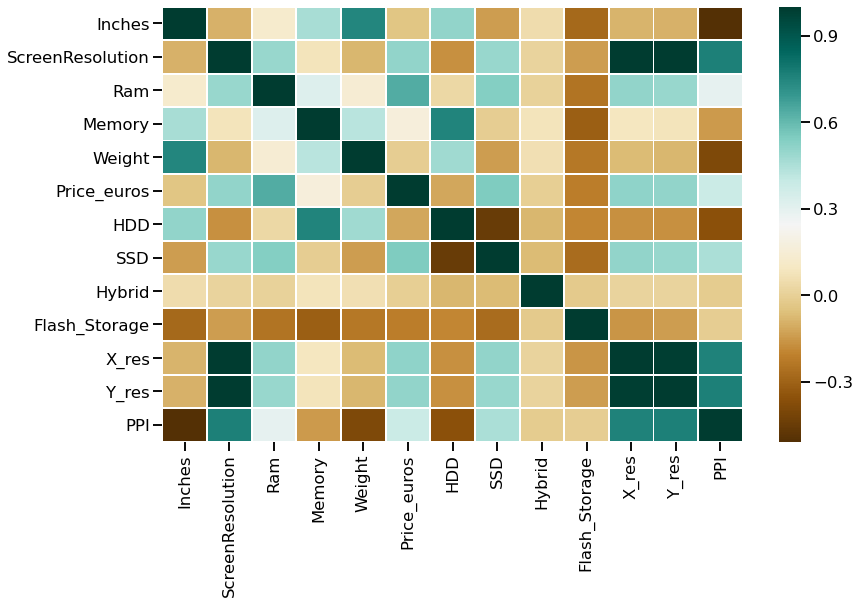

In [39]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=False, cmap="BrBG", linewidths=.9)

In [40]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
laptop_ID,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,2560.0,1600.0,226.983005
2,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,1440.0,900.0,127.677940
3,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920.0,1080.0,141.211998
4,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,2880.0,1800.0,220.534624
5,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,2560.0,1600.0,226.983005


Text(0.5, 1.0, 'Frequency of Laptops belonging to the respective companies')

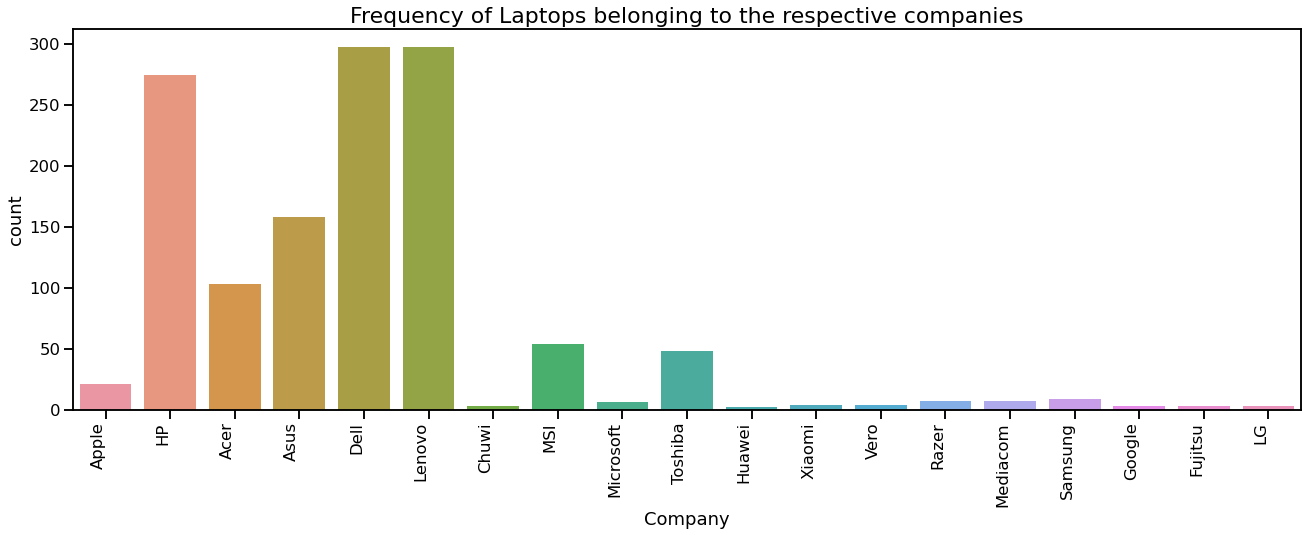

In [47]:
plt.figure(figsize=(22,7))
g =sns.countplot(df.Company)
sns.set_context('talk')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Frequency of Laptops belonging to the respective companies", size =22)

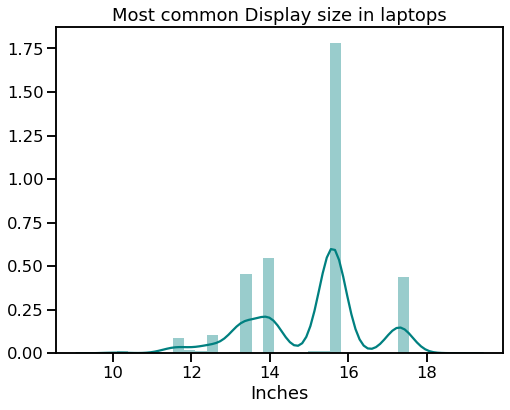

In [51]:
plt.figure(figsize=(8,6))
sns.distplot(df['Inches'], color = 'teal')
plt.title('Most common Display size in laptops', size = 18)
plt.show()

Text(0.5, 1.0, 'Types of Laptop available')

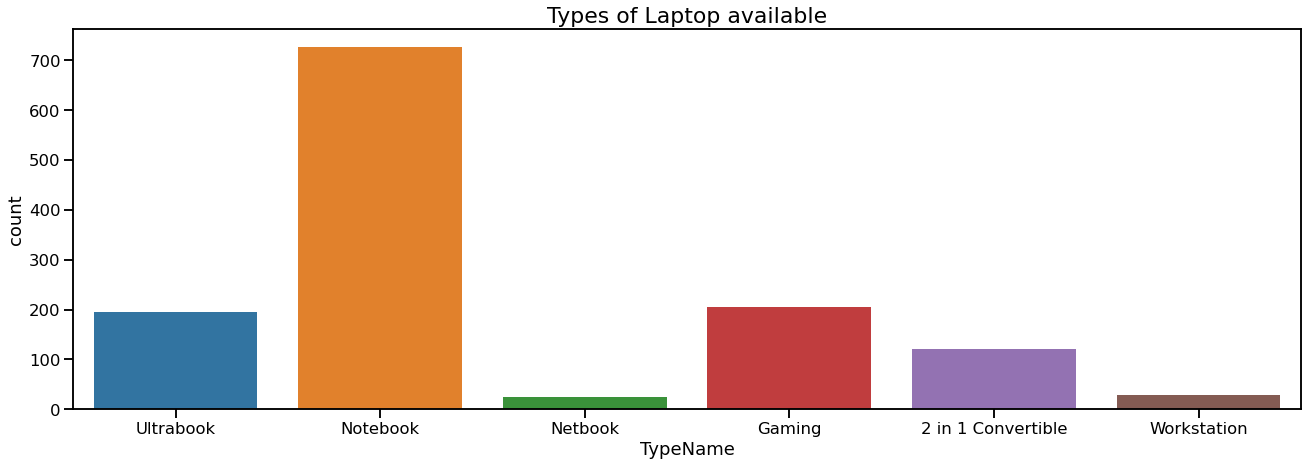

In [53]:
plt.figure(figsize=(22,7))
g =sns.countplot(df.TypeName)
sns.set_context('talk')
plt.title("Types of Laptop available", size =22)

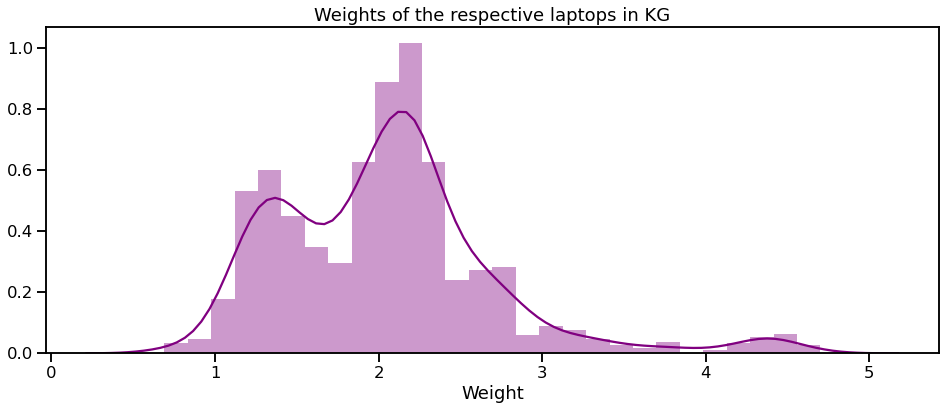

In [72]:
plt.figure(figsize=(16,6))
sns.distplot(df['Weight'], color = 'purple')
plt.title('Weights of the respective laptops in KG', size = 18)
plt.show()

Text(0.5, 1.0, 'Most Famous Cpu to look for')

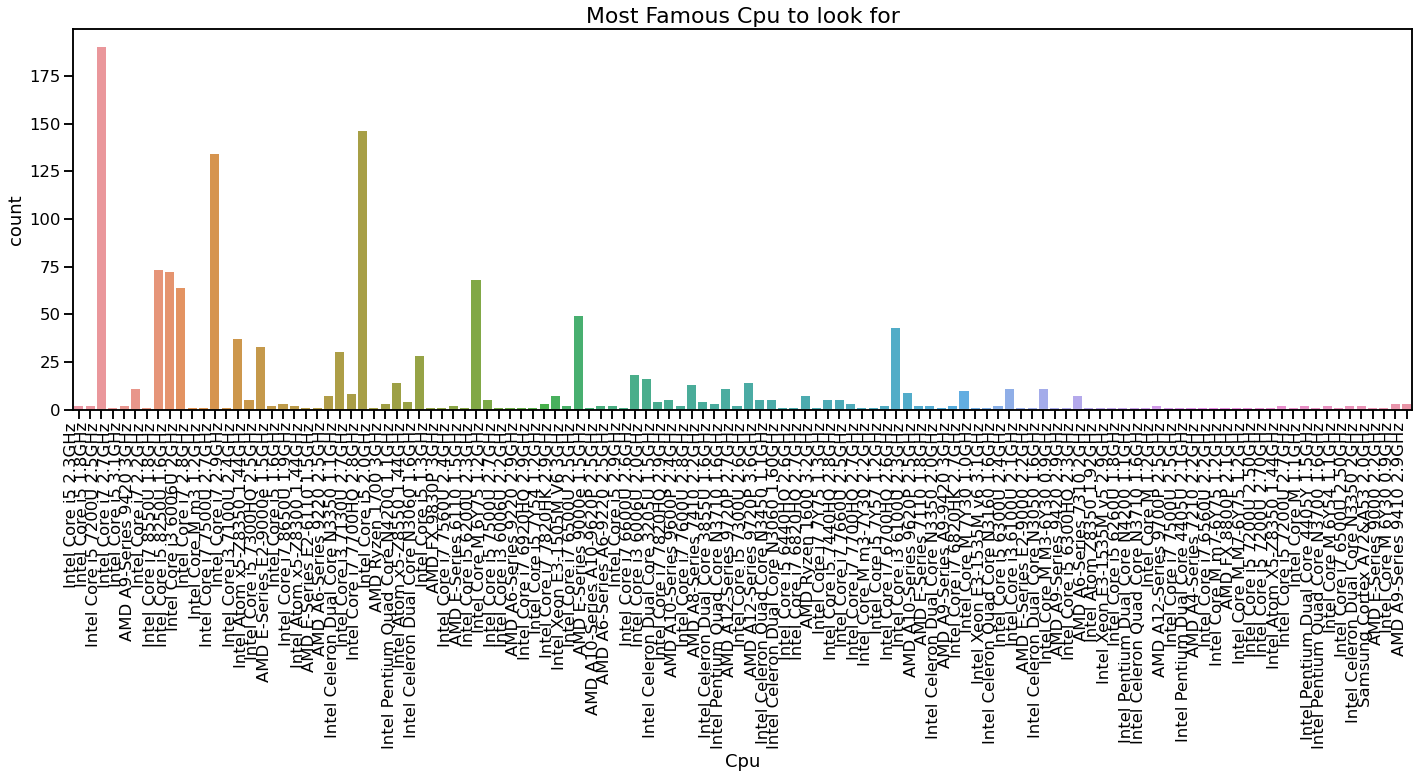

In [56]:
plt.figure(figsize=(24,7))
g =sns.countplot(df.Cpu)
sns.set_context('talk')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Most Famous Cpu to look for", size =22)

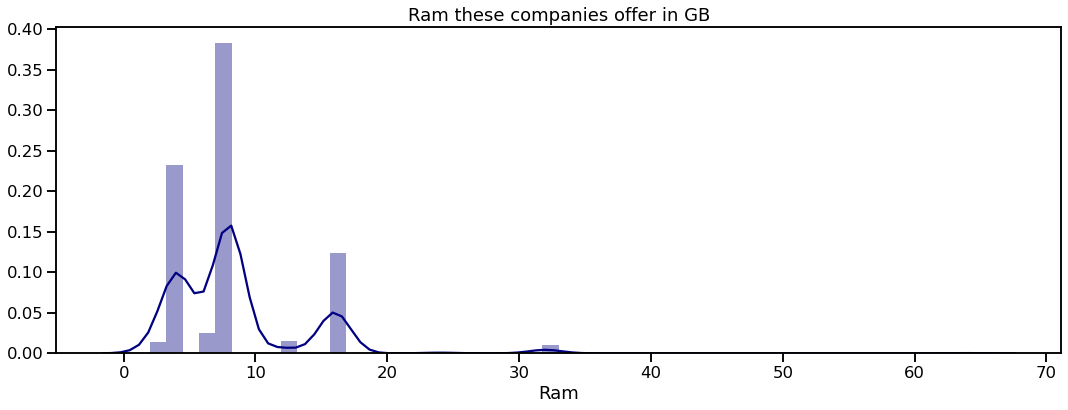

In [59]:
plt.figure(figsize=(18,6))
sns.distplot(df['Ram'], color = 'navy')
plt.title('Ram these companies offer in GB', size = 18)
plt.show()

Text(0.5, 1.0, 'Most Famous Gpus to look for')

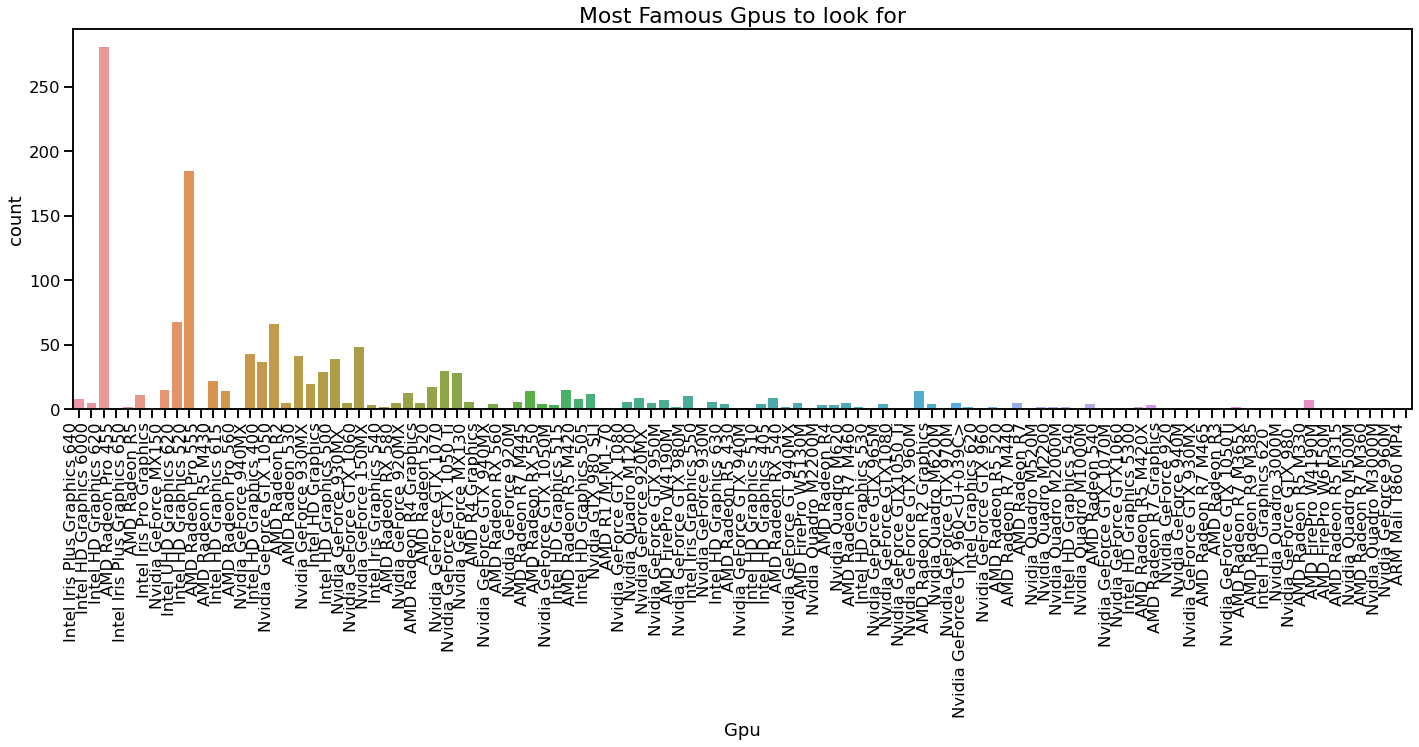

In [63]:
plt.figure(figsize=(24,7))
g =sns.countplot(df.Gpu)
sns.set_context('talk')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Most Famous Gpus to look for", size =22)

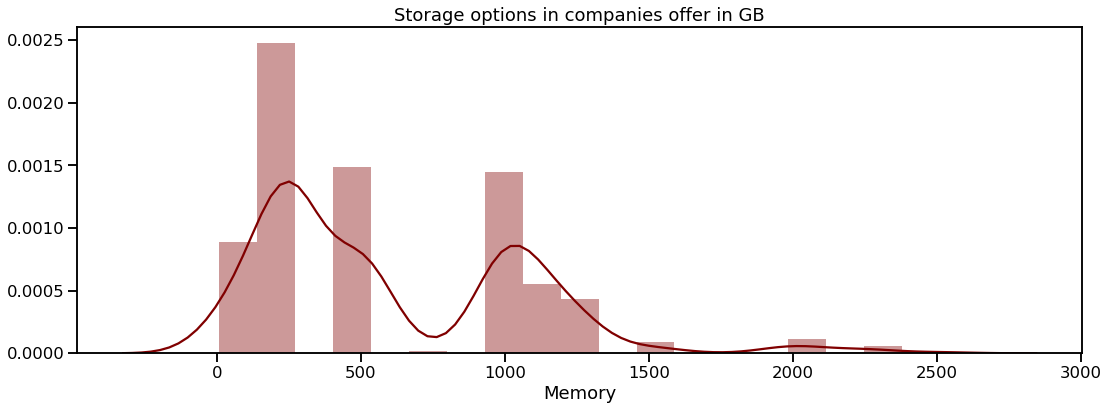

In [65]:
plt.figure(figsize=(18,6))
sns.distplot(df['Memory'], color = 'maroon')
plt.title('Storage options in companies offer in GB', size = 18)
plt.show()

Text(0.5, 1.0, 'Operating Systems to look for')

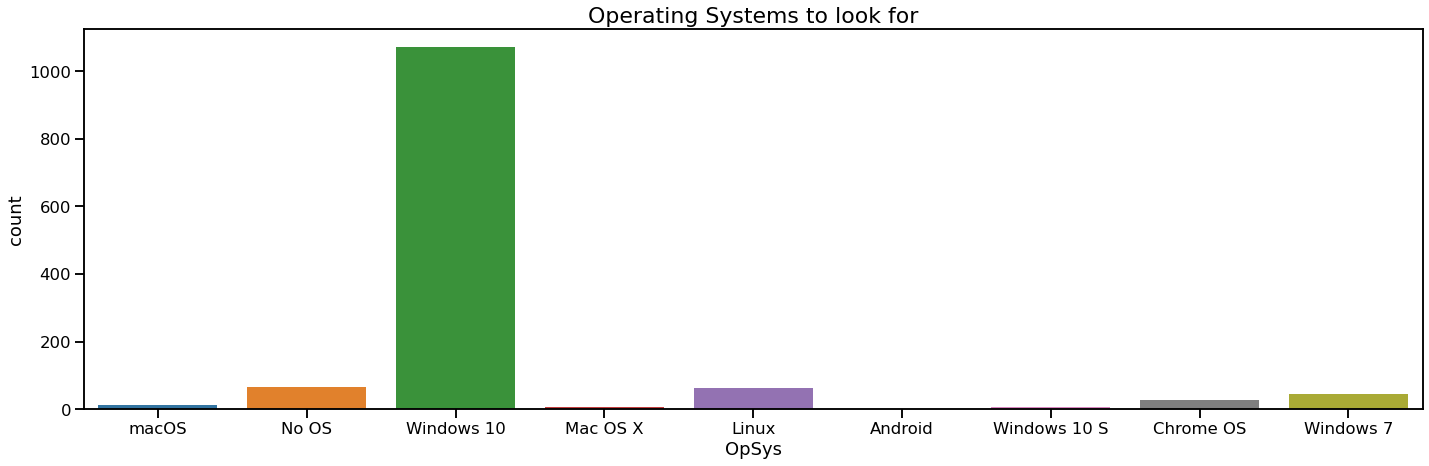

In [68]:
plt.figure(figsize=(24,7))
g =sns.countplot(df.OpSys)
sns.set_context('talk')
plt.title("Operating Systems to look for", size =22)

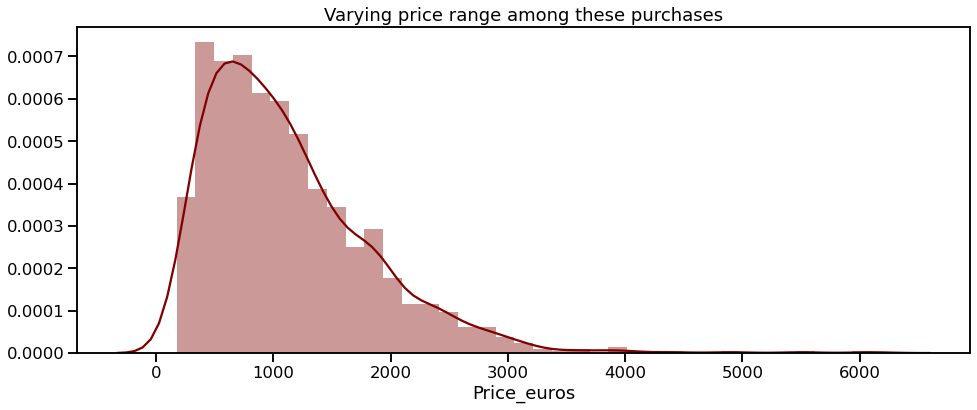

In [75]:
plt.figure(figsize=(16,6))
sns.distplot(df['Price_euros'], color = 'maroon')
plt.title('Varying price range among these purchases', size = 18)
plt.show()

---
---
---
# _Making the Model_

In [76]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,X_res,Y_res,PPI
laptop_ID,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0,2560.0,1600.0,226.983005
2,Apple,Macbook Air,Ultrabook,13.3,1296000.0,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128,1440.0,900.0,127.677940
3,HP,250 G6,Notebook,15.6,2073600.0,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0,1920.0,1080.0,141.211998
4,Apple,MacBook Pro,Ultrabook,15.4,5184000.0,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,0,512,0,0,2880.0,1800.0,220.534624
5,Apple,MacBook Pro,Ultrabook,13.3,4096000.0,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,256,0,0,2560.0,1600.0,226.983005


# _Independent and dependent features_

In [77]:
X=df.drop(['Price_euros'],axis=1)

In [78]:
y=np.log(df['Price_euros'].values)

## _Feature Engineering_

In [79]:
# getting dummies
X=pd.concat([X,pd.get_dummies(X)],axis=1)
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 1 to 1320
Columns: 910 entries, Company to OpSys_macOS
dtypes: float64(12), int32(2), int64(10), object(6), uint8(880)
memory usage: 1.4+ MB
None


In [80]:
X_=X.select_dtypes(exclude=['object'])

In [81]:
X_ = X_.loc[:,~X_.columns.duplicated()]
X=(X_-np.min(X_))/(np.max(X_)-np.min(X_))

# _Train-Test split_

In [83]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=43)

---
---
---
# _Now, Training the Model -_

---
---
# _Using Linear Regresion_
---

In [86]:
from sklearn import linear_model

In [102]:
linreg =linear_model.LinearRegression()
linreg_model = linreg.fit(X,y)

In [103]:
linreg_pred =linreg_model.predict(X)

### _Plotting the Prediction of Linear Regression Model_

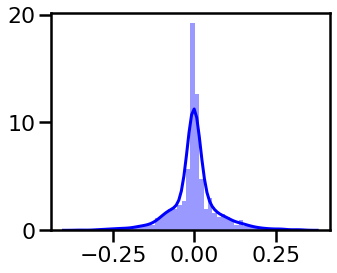

In [104]:
plt.figure(figsize=(5,4))
sns.set_context("poster")
sns.distplot(y-linreg_pred, color ="blue")

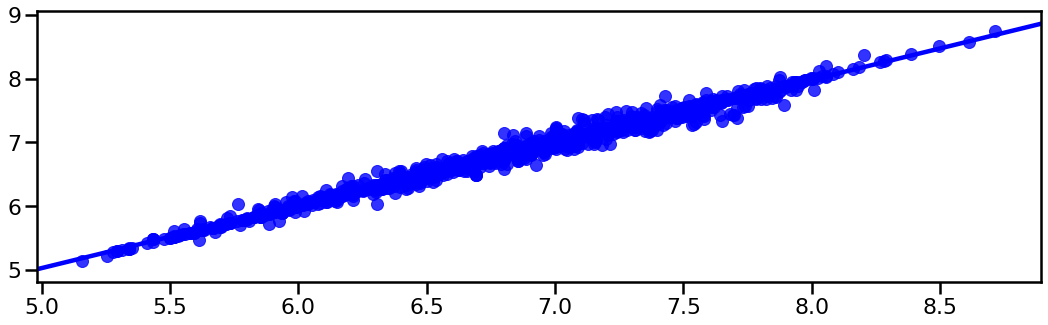

In [105]:
 plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y,linreg_pred, color ='blue')

In [93]:
from sklearn import metrics

In [106]:
print('Mean Absolute Error of Linear Regresson:', metrics.mean_absolute_error(y, linreg_pred))

Mean Absolute Error of Linear Regresson: 0.04511652617609875


In [107]:
print('Root Mean Squared Error of Linear Regresson:', np.sqrt(metrics.mean_squared_error(y, linreg_pred)))

Root Mean Squared Error of Linear Regresson: 0.07271512005742352


---
---
---

# _Using Random Forest Regressor_
---

In [108]:
from sklearn.ensemble import RandomForestRegressor

In [109]:
rf = RandomForestRegressor(n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [110]:
 rf_pred =rf_model.predict(X_test)

In [112]:
# rf_pred

### _Plotting prediction of Random forest model_

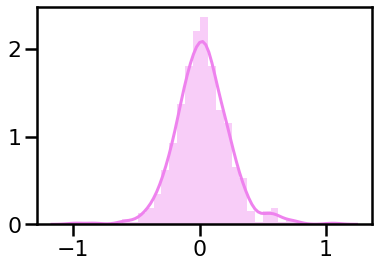

In [113]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y_test-rf_pred, color ="violet")

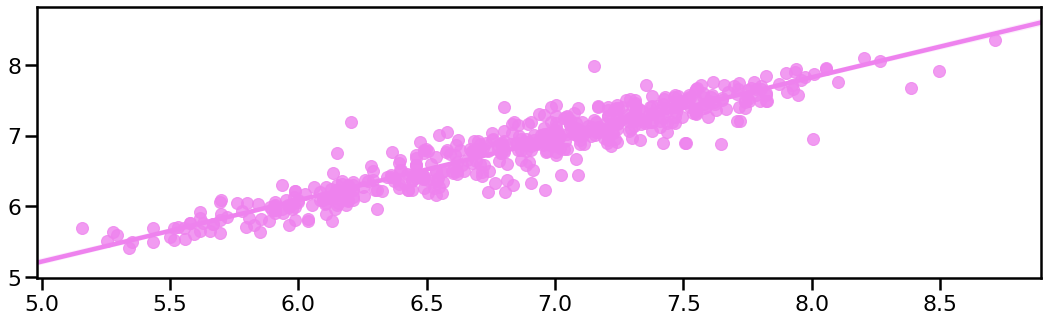

In [114]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y_test,rf_pred, color ='violet')

In [115]:
print('Mean Absolute Error of Random Forest Regressor:', metrics.mean_absolute_error(y_test, rf_pred))

Mean Absolute Error of Random Forest Regressor: 0.1609945940914385


In [116]:
print('Root Mean Squared Errorof Random Forest Regressor :', np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

Root Mean Squared Errorof Random Forest Regressor : 0.21743180342072382


---
---
---
# _Using Decision Tree Regressor_

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [125]:
tree=DecisionTreeRegressor()
tree.fit(X,y)

DecisionTreeRegressor()

In [126]:
tree_pred=tree.predict(X)

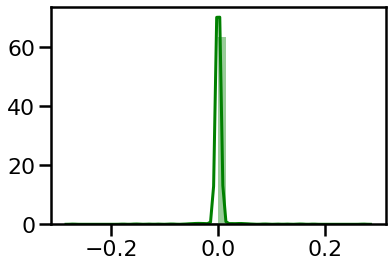

In [127]:
plt.figure(figsize=(6,4))
sns.set_context("poster")
sns.distplot(y-tree_pred, color ="green")

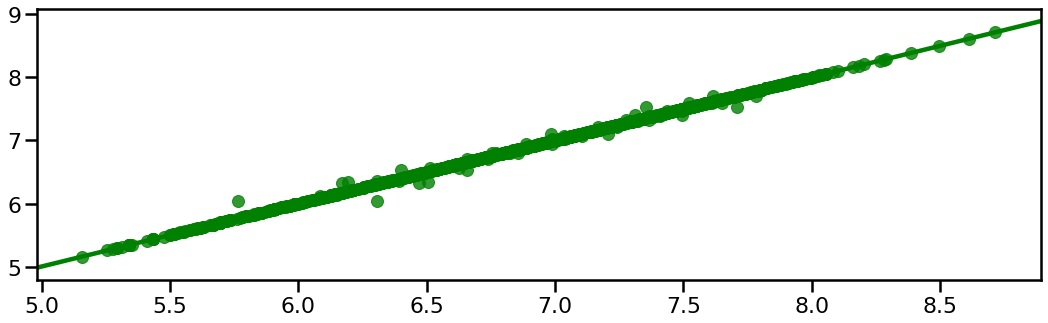

In [128]:
plt.figure(figsize=(18,5))
sns.set_context('poster')
sns.regplot(y,tree_pred, color ='green')

In [129]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, tree_pred))

Mean Absolute Error: 0.0027582802267348897


In [130]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, tree_pred)))

Root Mean Squared Error: 0.018429661785926976


---
---
---
# _C O N C L U S I O N :_
---

## _I have done Analysis as well as visualization of the Dataset.<br><br>And I have Trained the model using:_


- ### _Linear Regression_
- ### _Random Forest Regressor_
- ### _Decision Tree Regressor_

## _From the above 3 trained Models, It can be seen that_
## _the Decision Tree Regressor model performed better than the rest of the two models._
